## DATA OF VACCINE

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df.shape

(26707, 34)

In [48]:
df.head(5)


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,unique_id,sex_Male,race_Hispanic,race_Other or Multiple,race_White
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,0.0,0.0,0,0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,4.0,0.0,0.0,0,1,1,0,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,2.0,1.0,2.0,0.0,1,7,0,0,0,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,2.0,2.0,0.0,0.0,0,9,1,0,0,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,4.0,4.0,2.0,0.0,1,10,1,0,0,1


In [5]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [7]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [8]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [9]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:xlabel='sex', ylabel='count'>

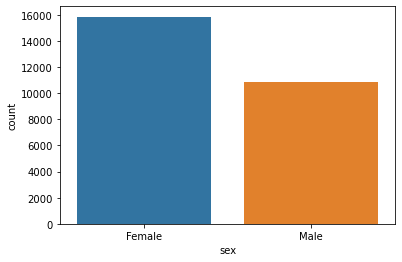

In [10]:
sns.countplot(x="sex",data=df)

<AxesSubplot:xlabel='unique_id', ylabel='sex'>

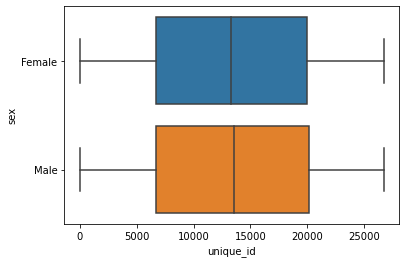

In [11]:
sns.boxplot(x="unique_id",y="sex",data=df)

array([[<AxesSubplot:title={'center':'unique_id'}>,
        <AxesSubplot:title={'center':'h1n1_worry'}>,
        <AxesSubplot:title={'center':'h1n1_awareness'}>,
        <AxesSubplot:title={'center':'antiviral_medication'}>,
        <AxesSubplot:title={'center':'contact_avoidance'}>],
       [<AxesSubplot:title={'center':'bought_face_mask'}>,
        <AxesSubplot:title={'center':'wash_hands_frequently'}>,
        <AxesSubplot:title={'center':'avoid_large_gatherings'}>,
        <AxesSubplot:title={'center':'reduced_outside_home_cont'}>,
        <AxesSubplot:title={'center':'avoid_touch_face'}>],
       [<AxesSubplot:title={'center':'dr_recc_h1n1_vacc'}>,
        <AxesSubplot:title={'center':'dr_recc_seasonal_vacc'}>,
        <AxesSubplot:title={'center':'chronic_medic_condition'}>,
        <AxesSubplot:title={'center':'cont_child_undr_6_mnths'}>,
        <AxesSubplot:title={'center':'is_health_worker'}>],
       [<AxesSubplot:title={'center':'has_health_insur'}>,
        <AxesSubplot:ti

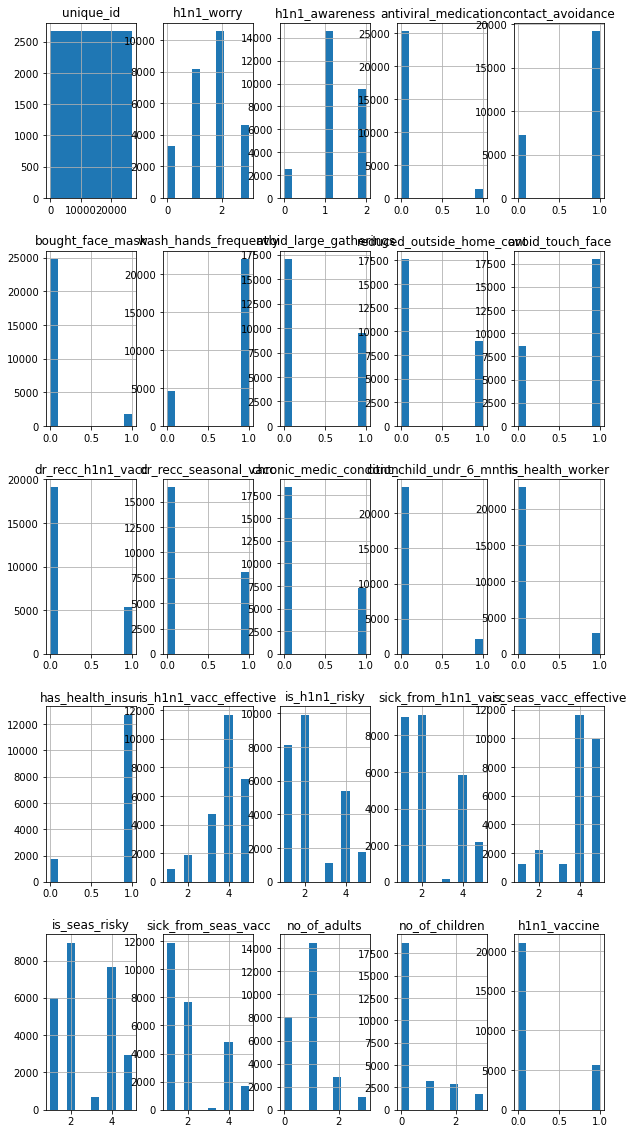

In [12]:
df.hist(figsize=(10,20))

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [15]:
dummies=pd.get_dummies(df[['unique_id','sex','race']],drop_first=True)

In [16]:

df=pd.concat([df,dummies],axis=1)

In [17]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,unique_id,sex_Male,race_Hispanic,race_Other or Multiple,race_White
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,"MSA, Not Principle City",0.0,0.0,0,1,1,0,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Employed,Non-MSA,2.0,0.0,1,7,0,0,0,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0,9,1,0,0,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Employed,"MSA, Not Principle City",2.0,0.0,1,10,1,0,0,1


In [18]:
df=df.drop(['employment','census_msa','age_bracket','qualification','race','sex','income_level','marital_status','housing_status'],axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  11794 non-null  int64  
 1   h1n1_worry                 11794 non-null  float64
 2   h1n1_awareness             11794 non-null  float64
 3   antiviral_medication       11794 non-null  float64
 4   contact_avoidance          11794 non-null  float64
 5   bought_face_mask           11794 non-null  float64
 6   wash_hands_frequently      11794 non-null  float64
 7   avoid_large_gatherings     11794 non-null  float64
 8   reduced_outside_home_cont  11794 non-null  float64
 9   avoid_touch_face           11794 non-null  float64
 10  dr_recc_h1n1_vacc          11794 non-null  float64
 11  dr_recc_seasonal_vacc      11794 non-null  float64
 12  chronic_medic_condition    11794 non-null  float64
 13  cont_child_undr_6_mnths    11794 non-null  flo

In [20]:

X=df.drop("h1n1_worry",axis=1)
Y=df["h1n1_worry"]

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [22]:
model=LogisticRegression()

In [23]:
model.fit(X_train,Y_train)

LogisticRegression()

In [24]:
model.score(X_test,Y_test)

0.4224357163040407

In [25]:
model.score(X_train,Y_train)

0.4196244700181708

In [26]:
predictions=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.4224357163040407

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(Y_test,predictions)

array([[   0,  164,  277,    0],
       [   0,  345,  872,    0],
       [   0,  248, 1150,    0],
       [   0,   48,  435,    0]], dtype=int64)

In [30]:
from sklearn import metrics

In [31]:
from sklearn.svm import SVC

In [32]:
model6=SVC()
model6.fit(X_train,Y_train)
print(model6.score(X_train,Y_train))
print(model6.score(X_test,Y_test))

0.3877649909145972
0.3950268437411698


In [33]:
from sklearn.svm import SVR

In [34]:
model6=SVR()
model6.fit(X_train,Y_train)
print(model6.score(X_train,Y_train))
print(model6.score(X_test,Y_test))

-0.17866507993294833
-0.16494791275841414


In [35]:
from sklearn.tree import DecisionTreeRegressor 

In [36]:
model7= DecisionTreeRegressor(random_state = 0) 
model7.fit(X, Y)

DecisionTreeRegressor(random_state=0)

In [37]:
print(model7.score(X_train,Y_train))
print(model7.score(X_test,Y_test))

1.0
1.0


In [38]:
from sklearn.ensemble import BaggingRegressor

In [39]:
model8= BaggingRegressor(random_state = 0) 
model8.fit(X, Y)
print(model8.score(X_train,Y_train))
print(model8.score(X_test,Y_test))

0.8599036143273284
0.8617618246534904


In [40]:
from sklearn.ensemble import AdaBoostRegressor

In [41]:
model9= AdaBoostRegressor(random_state = 0) 
model9.fit(X, Y)
print(model9.score(X_train,Y_train))
print(model9.score(X_test,Y_test))

0.2588028327654902
0.25576272912272313


In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
model10=  GradientBoostingRegressor(random_state = 0) 
model10.fit(X, Y)
print(model10.score(X_train,Y_train))
print(model10.score(X_test,Y_test))

0.35400182304391514
0.3558989887992303


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model11=   RandomForestRegressor(random_state = 0) 
model11.fit(X, Y)
print(model11.score(X_train,Y_train))
print(model11.score(X_test,Y_test))

0.8987935656293222
0.9000194827025054


# THANK YOU !